# Об'єктно-орієнтоване програмування
---
Парадигма ООП містить у собі 4 ключові принципи:

1. Інкапсуляція
2. Успадкування
3. Поліморфізм
4. Абстракція

У цьому ноутбуці розглянуто останні два з них.

## Поліморфізм

Поліморфізм - один з основних механізмів ООП, який дозволяє надавати однаковий інтерфейс для різних сутностей.


#### Чому це важливо?
Використання механізмів поліморфізму може дуже спростити процес розробки програм, а також забезпечити низку корисних властивостей одні з яких є:

 - Масштабовність
 - Зручність

##### Масштабовність
За умови використання механізмів поліморфізму, додавати новий функціонал до програмного забезпечення означає дописування нового коду, а не переписування старого

##### Зручність
Використання об'єктів з однаковим інтерфейсом дає змогу спростити написання програми та викликати один і той самий метод для усіх об'єктів. Це дозволяє уникнути складних розгалужених перевірок на тип конкретного об'єкту та викликів окремих функції для кожного з них.

#### Поліморфізм в python

Поліморфними у програмуванні можуть бути функції та методи. Вони можуть визначатися з аргументами різного типу, а їх поведінка буде визначатися типом переданих аргументів. Python не має строгої типизації, а отже усі функції та методи приймають аргументи будь-якого типу, а тому всі вони є поліморфними.

Основною силою поліморфізму є можливість **перевизначати методи суперкласів** у підкласах.
Насправді цією властивістю ми вже не один раз користалися перевизначаючи методи `__init__`, `__str__`, `__eq__` та інші, адже усі вони є методами суперкласу `object`, але виклик відбувався саме методу визначеного у підкласі.

In [2]:
class Animal:
  def __init__(self):
    self.speak()

  def speak(self):
    print("Some sounds")

class Dog(Animal):
    def speak(self):
        print("Woof!")

class Cat(Animal):
    def speak(self):
        print("Meow!")

В даному прикладі класи `Dog` та `Cat` є поліморфними, оскільки вони мають однаковий інтерфейс. 

In [3]:
print("Dog speaks:")
dog = Dog()
print("Cat speaks:")
cat = Cat()
print("Animal speaks:")
animal = Animal()

Dog speaks:
Woof!
Cat speaks:
Meow!
Animal speaks:
Some sounds


#### Качина типізація

Качина типізація - різновид динамічної типізації, яка
застосовується в деяких мовах програмування, коли межі
використання об'єкта визначаються його **поточним набором
методів й властивостей**, на противагу успадкуванню від певного
класу.

James Whitcomb Riley: 
_“When I see a bird that walks like a duck and swims like a duck and quacks like a duck, I call that bird a duck.”_

Таким чином, типом усіх об'єктів, які реалізовують певний набір методів, можна вважати інтерфейс, який об'єднує усі ці методи.

Наприклад, нехай у інтерфейсі **Тварина** є лише метод говорити, тоді будь-який об'єкт який має метод `speak` буде вважатися твариною, не заложно від успадкування.

In [1]:
class Cow:
    def speak(self):
        print("Mooo!")

class Bee:
    def speak(self):
        print("Buzz!")

Об'єкти таких класів можна використовувати як і будь-які інші об'кти які успадковують клас `Animal`, хоча вони й не наслідуються від нього.

## Абстракція

> Абстракція - механізм приховання деталей реалізації від користувача і надання інтерфейсу для взаємодії з цими деталями. Іншими словами, абстракція дозволяє працювати з об'єктами на високому рівні абстракції, ігноруючи деталі їхньої реалізації.

Основним способом застосування абстракції у програмуванні є **явне прописування інтерфейсів взаємодії**.

### Абстрактні базові класи

Абстрактним базовим класом (Abstract Base Class, ABC) називають клас, який не використовується для створення об’єктів. Призначення таких класів полягає у визначенні інтерфейсів. 

Визначення інтерфейсів полягає у встановленні атрибутів та методів, які повинні бути реалізовані в класах.

Кожен з ABC визначає **множину методів та властивостей**, які необхідно реалізувати у класі для того, щоб він вважався екземпляром качиного типу цього абстрактного класу.

Клас що реалізує інтерфейс абстракного класу має містити реалізацю **усіх визначених у інтерфейсі методів**, а також можливо якихось додаткових.

*Приклад*: У модулі `collections.abc` знаходяться більшість абстракних класів стандартної бібліотеки python:

In [4]:
import collections.abc as classes

classes.__all__

['Awaitable',
 'Coroutine',
 'AsyncIterable',
 'AsyncIterator',
 'AsyncGenerator',
 'Hashable',
 'Iterable',
 'Iterator',
 'Generator',
 'Reversible',
 'Sized',
 'Container',
 'Callable',
 'Collection',
 'Set',
 'MutableSet',
 'Mapping',
 'MutableMapping',
 'MappingView',
 'KeysView',
 'ItemsView',
 'ValuesView',
 'Sequence',
 'MutableSequence',
 'ByteString']

Діаграма класів зображує основні класи в модулі `collection.abc` Python та їх взаємозв'язок із вбудованими типами контейнерів.
https://sangmoonoh.medium.com/just-class-diagram-for-python-3-collections-abstract-base-classes-e1eafde6ad25

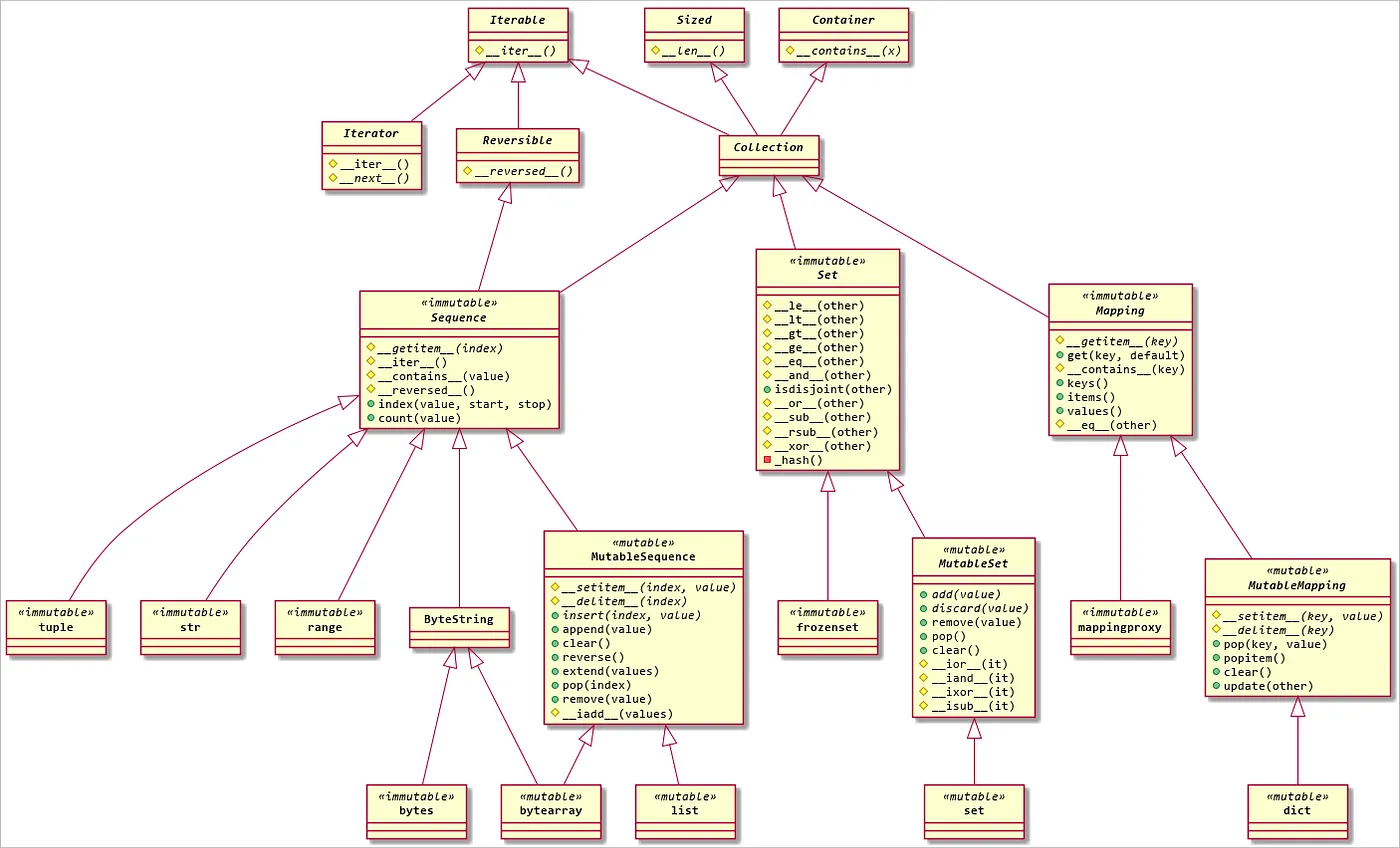

Як бачимо різні класи вимагабть реалізувати відповідні методи, який називають абстрактними методами. Наприклад, метод `__contains__` реалізований в списках, рядках, словниках, множинах, кортежах для встановлення чи вказане значення входить до цих колекцій (структур даних). Якщо визначити цей метод у своєму класі, то екземляр цього класу будео б'єктом контейнером (екземпляром класу Container), а це допоможе виконувати перевірку на входжен (оператор in).

Наприклад, контейнер, який вказує на те чи належить задане значення до непарних цілих чисел:

In [1]:
from collections.abc import Container

class OddContainer:
    def __contains__(self, x):
        return bool(isinstance(x, int) and x % 2)

odd_container = OddContainer()
print(odd_container.__contains__(1))
print(isinstance(odd_container, Container))
#Абстрактний базовий клас дозволяє реалізувати is a зв’язок без необхідності використовувати успадкування
print(issubclass(OddContainer, Container))

True
True
True


Будь-який клас в якому визначено метод `__contains__` буде Container і можна буде скористатися оператором `in` для перевірки входження

In [4]:
print(1 in odd_container)
print(2 in odd_container)
print('1' in odd_container)

True
False
False


Більшістю інтерфейсів визначених у цих класах ви користувалися вже багато разів.

Наприклад: абстрактний клас `Sized` містить в собі метод `__len__`, який викликається при виклику функції `len()` на списку, сету, чи словнику, а отже кожен з них реалізовує цей інтерфейс.

### Створення своїх абстрактних класів

Абстрактні класи можна створити й власноруч. Щоб клас можна було назвати абстрактним, він має містити **принаймні 1 абстрактинй метод**.

Абстрактні методи не мають реалізації, замість блоку коду метода стоїть інструкція `pass`. Якщо такий метод не буде реалізовано, при виклику він буде повертати `None`.

Якщо ж з певних причин необхідно змусити користувача реалізувати певний метод, тоді можна використати наступну конструкцію `raise NotImplementedError`, тоді при виклику не перевизначеного методу буде виникати помилка виконання програми.

In [5]:
class AbstractAnimal:
  def walk(self):
    pass

  def speak(self):
    raise NotImplementedError

class Dog(AbstractAnimal):
  def walk(self):
    print("Dog went for a walk")

  def speak(self):
    print("Woof!")

  def swim(self):
    print("Dog is swimming in the pool")

class Cat(AbstractAnimal):
  pass

dog = Dog()
cat = Cat()

In [6]:
print("Dog can walk, because it is implemented in class Dog:")
dog.walk()
print("Cat can not walk; asking the cat to walk does not "
      "cause any errors, because cats are simply lazy:")
cat.walk()

Dog can walk, because it is implemented in class Dog:
Dog went for a walk
Cat can not walk; asking the cat to walk does not cause any errors, because cats are simply lazy:


In [7]:
print("Dog can speak:")
dog.speak()
print("Cat can not speak, and asking for it will cause an error "
      "because they should, but some programmer forgot to implement it:")
cat.speak()

Dog can speak:
Woof!
Cat can not speak, and asking for it will cause an error because they should, but some programmer forgot to implement it:


NotImplementedError: 

In [8]:
print("Dog can swim:")
dog.swim()
print("Cats can not swim, and asking him to swim will cause " 
      "an error because it is not a part of the interface:")
cat.swim()

Dog can swim:
Dog is swimming in the pool
Cats can not swim, and asking him to swim will cause an error because it is not a part of the interface:


AttributeError: 'Cat' object has no attribute 'swim'

# Статичні методи та методи класу

Методи в класі, які можуть бути викликані без cтворення екземпляра класа:
- статичні методи – звичайні функції, які знаходяться всередині класу
- методи класу - методи, які першим аргументом замість екземпляра
класу отримують клас

Для створення цих методів всередині класа викликаються вбудовані спеціальні функції `staticmethod` та `classmethod`, або використовуються декоратори `@staticmethod` та `@classmethod`.

Методи, яким не передається посилання на екземпляр і виклик яких здійснюється через ім’я класу, не потребують оголошення з допомогою функції staticmethod, але тоді не буде можливості їх викликати через екземпляри.

Статичні методи та методи класів дозволяють здійснювати обробку даних, які пов’язані з класами а не з екземплярами класів.

In [45]:
class Methods:

    cons = 3

    def imeth(self, x): # Звичайний метод екземпляра
        print(self, x)

    def smeth(x): # Статичний метод: екземпляр не передається
        print(x)

    def cmeth(cls, x): # Метод класа: отримує клас, а не екземпляр
        print(cls, x)

    smeth = staticmethod(smeth) # Зробити smeth статичним методом
    cmeth = classmethod(cmeth) # Зробити cmeth методом класу

meth = Methods()
meth.imeth(3)
Methods.smeth(3)
Methods.cmeth(3)

<__main__.Methods object at 0x1183e2fd0> 3
3
<class '__main__.Methods'> 3


In [47]:
class Methods:
    
    def imeth(self, x): # Звичайний метод екземпляра
        print(self, x)
    
    @staticmethod
    def smeth(x): 
        print(x)
    
    @classmethod
    def cmeth(cls, x):
        print(cls, x)

meth = Methods()
meth.imeth(3)
Methods.smeth(3)
Methods.cmeth(3)

<__main__.Methods object at 0x1183e0410> 3
3
<class '__main__.Methods'> 3


Ще один приклад

In [38]:
class Date:

    day, month, year = 0, 0, 0

    def __init__(self, day=0, month=0, year=0):
        self.day = day
        self.month = month
        self.year = year
    
    @classmethod
    def from_string(cls, date_as_string):
        day, month, year = map(int, date_as_string.split('-'))
        return cls(day, month, year)
    
    @staticmethod
    def is_date_valid(date_as_string):
        day, month, year = map(int, date_as_string.split('-'))
        return day <= 31 and month <= 12 and year <= 3999
    
is_date = Date.is_date_valid('14-03-2023')
date2 = Date.from_string('14-03-2023')
print(is_date)
print(date2)

True
